# Projeto para predição de diabetes utilizando diferentes algoritmos de classificação

Dataset Utilizado: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Importando o dataset

In [2]:
dados = pd.read_csv("diabetes_prediction_dataset.csv")
dados.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Verificando o comportamento dos dados

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
dados[dados.duplicated() == True].count()

gender                 3854
age                    3854
hypertension           3854
heart_disease          3854
smoking_history        3854
bmi                    3854
HbA1c_level            3854
blood_glucose_level    3854
diabetes               3854
dtype: int64

O dataset possui 3854 dados duplicados

In [5]:
dados_nao_duplicados = dados.drop_duplicates()
dados_nao_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


Como visto, nenhuma das colunas possui a presença de valores nulos

In [6]:
categoricos = ['gender', 'hypertension', 'heart_disease','smoking_history','diabetes']
continuos = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [7]:
dados_nao_duplicados[continuos].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,27.321461,5.532609,138.218231
std,22.462948,6.767716,1.073232,40.909771
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.400000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,59.000000,29.860000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


## Criando algumas visualizações

### Variáveis contínuas

Text(0.5, 0.98, 'Box plots para as variáveis contínuas')

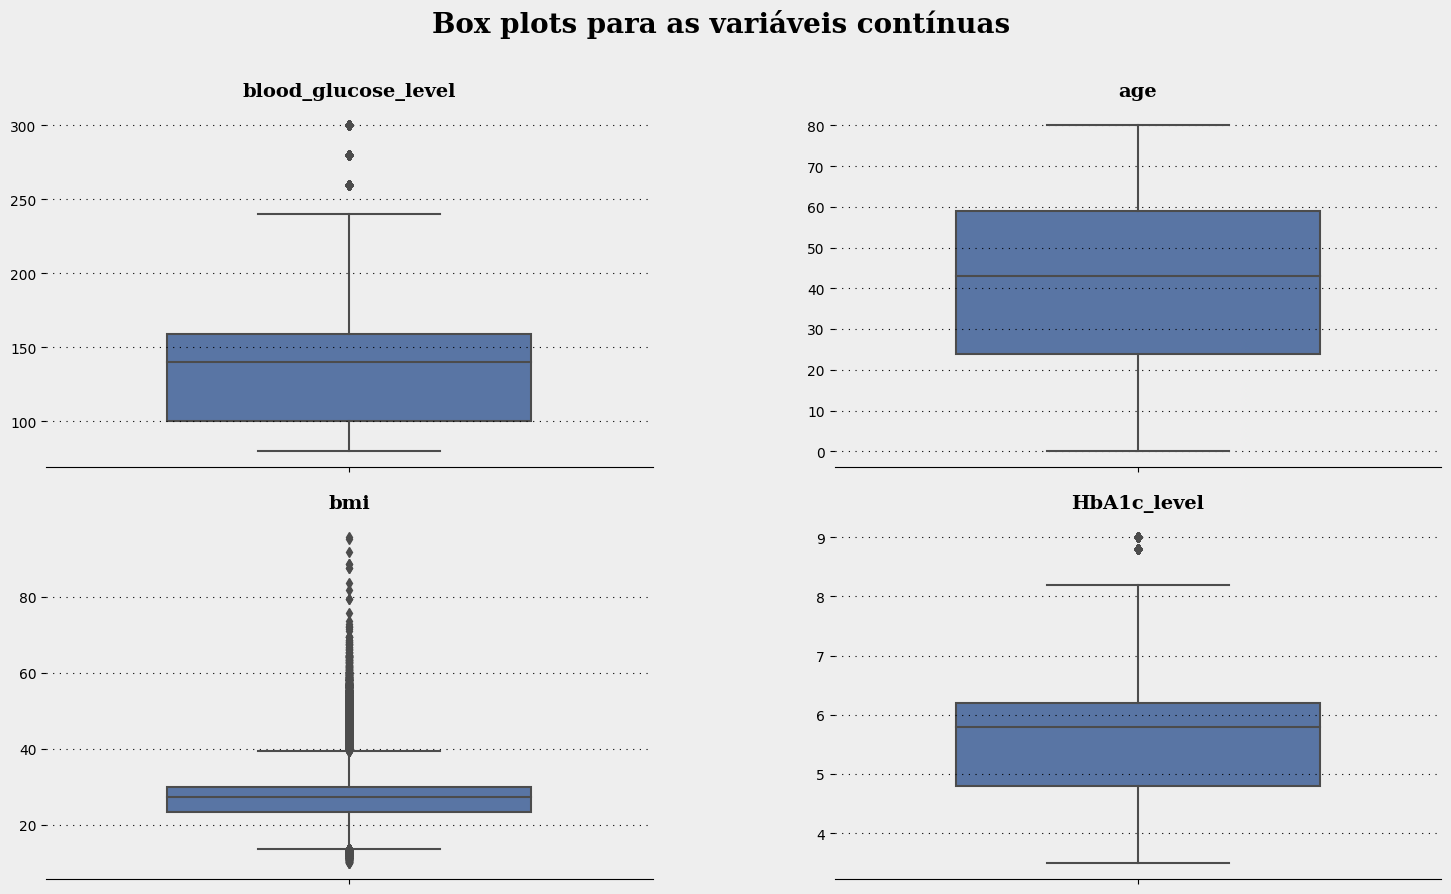

In [8]:
sns.set_palette("deep")
fig = plt.figure(figsize=(18,10))
grid_location = fig.add_gridspec(2,2)
grid_location.update(wspace=0.3, hspace=0.15)
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 

ax = []

for i in range(len(continuos)):
    if(i < 2):
        ax.append(fig.add_subplot(grid_location[0,i]))
    else:
        ax.append(fig.add_subplot(grid_location[1,i-2]))
    ax[i].set_facecolor(background_color) 
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

# Box plot para cada uma das variaveis
for i in range(len(continuos)):
    ax[i].text(0.5, 1.05, continuos[i-1], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000",
            horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes)
    ax[i].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.boxplot(ax=ax[i],y=dados_nao_duplicados[continuos[i-1]],width=0.6)
    ax[i].set_ylabel("")
    ax[i].spines["bottom"].set_visible(True)

fig.suptitle("Box plots para as variáveis contínuas",fontsize=20, fontweight='bold',fontfamily='serif', color="#000000")

Pode-se perceber que a maioria das variáveis possui uma pequena parcela de outiliers, com excessão da feature "bmi". Nesse projeto não irei me aprofundar na questão dos outliers, mas esses poderiam ser estudos em um projeto mais aprofundado

### Variáveis categóricas

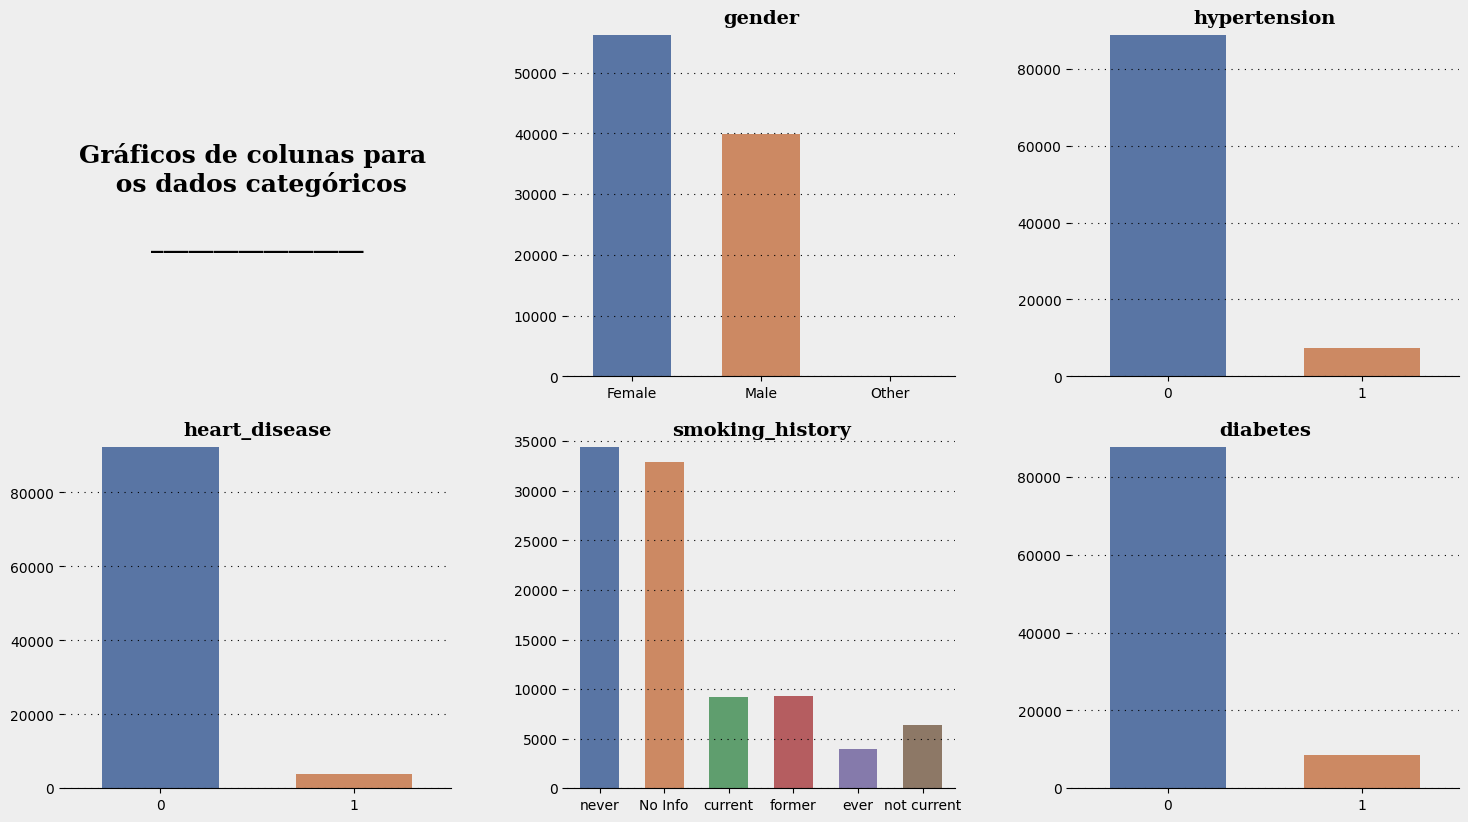

In [9]:
sns.set_palette("deep")
fig = plt.figure(figsize=(18,10))
grid_location = fig.add_gridspec(2,3)
grid_location.update(wspace=0.3, hspace=0.15)
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 

ax = []

for i in range(len(categoricos) + 1):
    if(i < 3):
        ax.append(fig.add_subplot(grid_location[0,i]))
    else:
        ax.append(fig.add_subplot(grid_location[1,i-3]))
    ax[i].set_facecolor(background_color) 
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

# Titulo da imagem
ax[0].tick_params(left=False, bottom=False)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].text(0.5,0.5,
         'Gráficos de colunas para \n os dados categóricos\n\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Count plot para cada uma das variaveis
for i in range(1, len(categoricos) + 1):
    ax[i].text(0.5, 1, categoricos[i-1], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000",
               horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes)
    ax[i].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.countplot(ax=ax[i],x=dados_nao_duplicados[categoricos[i-1]],width=0.6)
    ax[i].set_ylabel("")
    #ax[i].set(xticklabels=name_xlabels[i])
    ax[i].set_xlabel("")
    ax[i].spines["bottom"].set_visible(True)

Em relação ao output (feature "diabetes") é possível perceber que os dados não estão balanceados. Esse não balanceamento, pode ser tratado utilizando Undersampling ou Oversampling. Nesse projeto irei aplicar a técnica de undersampling e também realizarei uma compração com o modelo sem undersampling.

O erro que pode ser ocasionado no modelo sem undersampling é a não diferenciação da classe minoritária, que nesse caso são as pessoas diabéticas. A classificação incorreta poderia realizar um diagnóstico negativo para um paciente positivo para diabetes, o que poderia gerar ainda mais prejuízos.

As outras features também apresentam a maioria das pessoas concentradas em 1 ou 2 classes. 

## Classificação utilizando diferentes modelos

### Importando os métodos necessários

In [10]:
# Preprocessing
from sklearn.preprocessing import Normalizer

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score

#GridSearch
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler

### Pre-processamento dos dados

In [11]:
dados_aux = dados_nao_duplicados

# Convert categorical columns into dummy/indicator variables
dados_aux = pd.get_dummies(dados_aux, columns = categoricos[:-1], drop_first = True)

target_feature = 'diabetes'

# Features
X = dados_aux.drop([target_feature],axis=1)

# Target
y = dados_aux[[target_feature]]

# Using normalizer
scaler = Normalizer()
X[continuos] = scaler.fit_transform(X[continuos])
X.head()

,age,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,hypertension_1,heart_disease_1,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.489793,0.154224,0.040408,0.857138,False,False,False,True,False,False,False,True,False
1,0.537162,0.271764,0.065653,0.795796,False,False,False,False,False,False,False,False,False
2,0.171915,0.167740,0.034997,0.970095,True,False,False,False,False,False,False,True,False
3,0.223711,0.145723,0.031071,0.963199,False,False,False,False,True,False,False,False,False
4,0.437116,0.115836,0.027607,0.891487,True,False,True,True,True,False,False,False,False


### Balanceando os dados

In [12]:
rand_undersampling = RandomUnderSampler(random_state = 0)
X_undersampling, y_undersampling = rand_undersampling.fit_resample(X, y)

In [13]:
y_undersampling.value_counts()

diabetes
0           8482
1           8482
Name: count, dtype: int64

Como mostrado acima, os dados agora estão balanceados. Desse modo, pode-se continuar nas etapas para a criação dos modelos

### Split em dados de treino e teste

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_undersampling,y_undersampling, test_size = 0.2,random_state=0)

### Treinando os algoritmos

In [15]:
logreg = LogisticRegression(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)
print("Regressão logística - Acurácia", accuracy_score(y_test, y_pred).round(4))
svc = SVC(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = svc.predict(X_test)
print("SVM - Acurácia", accuracy_score(y_test, y_pred).round(4))
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print("KNN - Acurácia", accuracy_score(y_test, y_pred).round(4))
rand_forest = RandomForestClassifier(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = rand_forest.predict(X_test)
print("Random forest - Acurácia", accuracy_score(y_test, y_pred).round(4))

Regressão logística - Acurácia 0.72


SVM - Acurácia 0.7291
KNN - Acurácia 0.7536
Random forest - Acurácia 0.7905


In [16]:
y_test.value_counts()

diabetes
1           1739
0           1654
Name: count, dtype: int64

## Usando GridSearchCV

### Função para criar a matriz de confusão

In [17]:
def plot_confusion_matrix(y_test,y_pred, name_model):
    fig = plt.figure(figsize=(6,4))
    background_color = "#eeeeee"
    fig.patch.set_facecolor(background_color) 
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap="crest")
    ax.set_facecolor(background_color)
    ax.set(xticklabels=["Sem diabetes","Diabéticos"])
    ax.set(yticklabels=["Sem diabetes","Diabéticos"])
    ax.set_title("Matriz de confusão: " + name_model)

### Função para realizar o treino dos modelos e apresentar as métricas

In [18]:
def trainModel(model, parameters, X_train, y_train, X_test, y_test, name):

    grid_searcher = GridSearchCV(model, parameters, scoring='accuracy')

    # fitting the object
    grid_searcher.fit(X_train, y_train.values.ravel())

    print("-------", name, "-------")

    # the scores
    print("O(s) melhore(s) parâmetro(s) encontrado(s):", grid_searcher.best_params_)

    # predicting the values
    y_pred = grid_searcher.predict(X_test)

    # printing the test accuracy
    print("A acurácia, para os melhores parâmetros, nos dados de teste foi de:", 
        accuracy_score(y_test, y_pred))
    
    print("O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de:",recall_score(y_test, y_pred, average=None).round(2))
    print("A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de:",precision_score(y_test, y_pred, average=None).round(2))

    plot_confusion_matrix(y_test,y_pred, name)

### Regressão Logística

------- Regressão Logística -------
O(s) melhore(s) parâmetro(s) encontrado(s): {'C': 5}
A acurácia, para os melhores parâmetros, nos dados de teste foi de: 0.7359269083407014
O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.74 0.73]
A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.72 0.75]


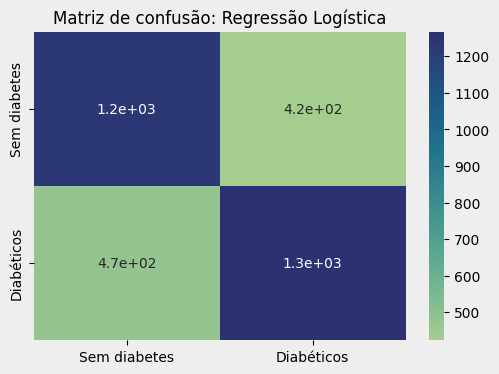

In [19]:
logreg = LogisticRegression()
parameters = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2, 5]}
trainModel(logreg, parameters, X_train, y_train, X_test, y_test, "Regressão Logística")

### SVM

------- SVC -------
O(s) melhore(s) parâmetro(s) encontrado(s): {'C': 5, 'gamma': 'scale'}
A acurácia, para os melhores parâmetros, nos dados de teste foi de: 0.7418213969938108
O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.72 0.76]
A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.74 0.74]


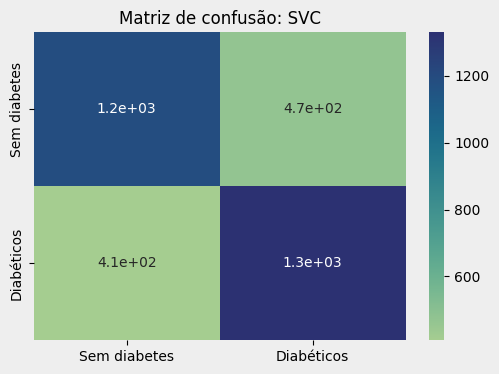

In [20]:
svm = SVC(random_state=0)
parameters = {"C": [0.1,0.5,1,5],
              'gamma':['scale','auto']}
trainModel(svm, parameters, X_train, y_train, X_test, y_test, "SVC")

### KNN

------- KNN -------
O(s) melhore(s) parâmetro(s) encontrado(s): {'n_neighbors': 19}
A acurácia, para os melhores parâmetros, nos dados de teste foi de: 0.757736516357206
O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.75 0.77]
A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.75 0.76]


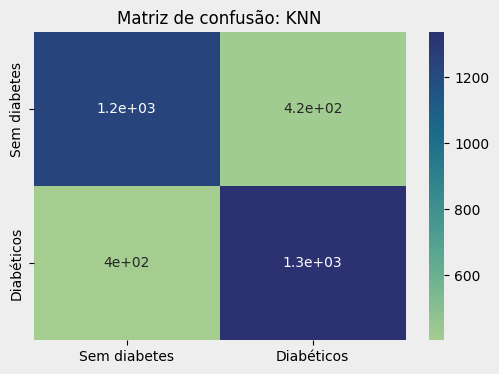

In [21]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[3,4,7,11,19]}
trainModel(knn, parameters, X_train, y_train, X_test, y_test, "KNN")

### Random Forest

------- Floresta Aleatória -------
O(s) melhore(s) parâmetro(s) encontrado(s): {'n_estimators': 100}
A acurácia, para os melhores parâmetros, nos dados de teste foi de: 0.7904509283819628
O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.79 0.79]
A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.78 0.8 ]


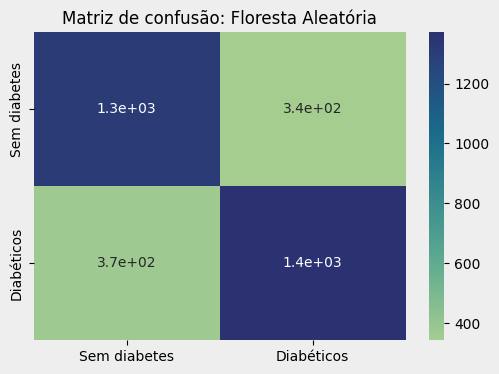

In [22]:
randforest = RandomForestClassifier(random_state=0)
parameters = {"n_estimators": [10,30,100]}
trainModel(randforest, parameters, X_train, y_train, X_test, y_test, "Floresta Aleatória")

## [Extra] Mostrando como seria inconsistente os dados sem undersampling

------- Floresta Aleatória -------
O(s) melhore(s) parâmetro(s) encontrado(s): {'n_estimators': 100}
A acurácia, para os melhores parâmetros, nos dados de teste foi de: 0.9318252730109204
O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.99 0.34]
A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.94 0.73]


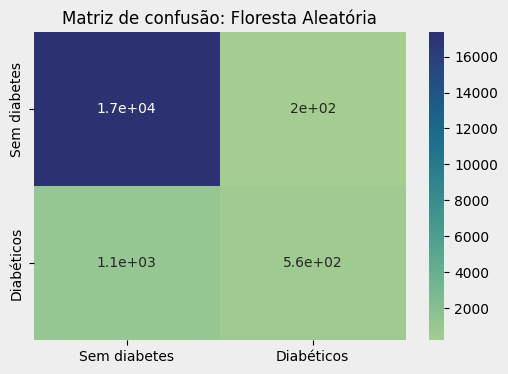

In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size = 0.2,random_state=0)
randforest = RandomForestClassifier(random_state=0)
parameters = {"n_estimators": [10,30,100]}
trainModel(randforest, parameters, X_train2, y_train2, X_test2, y_test2, "Floresta Aleatória")

Random Forest

Acurácia sem balanceamento: 0.9318

Acurácia com balanceamento: 0.7904  

Recall-diabeticos sem balanceamento: 0.34

Recall-diabeticos com balanceamento: 0.79

Como pode ser visto, aproximadamente 560 (5.6e+02) foram classificados como diabéticos, e outros 1100 (1.1e+03) tiveram a classificação errada, resultando em um recall de 0.34 para a classe "Diabéticos". Desse modo, verifica-se um problema relacionado aos dados desbalanceado, assim como foi falado anteriormente. Nesse caso, mesmo a acurácia tendo um valor maior do que no caso com balanceamento, muitas pessoas positivas para diabetes foram classificadas como saudáveis, mostrado pelo valor baixo do Recall para a classe "Diabéticos".

## Exportando o modelo

In [24]:
import pickle

randforest = RandomForestClassifier(random_state=0, n_estimators=300)
randforest.fit(X_train, y_train.values.ravel())

pickle.dump(randforest, open('random_forest_diabetes_model.pkl', 'wb'))

## Salvando a base de dados com undersampling

In [39]:
dados_aux = dados_nao_duplicados
target_feature = 'diabetes'
X = dados_aux.drop([target_feature],axis=1)
y = dados_aux[[target_feature]]

rand_undersampling = RandomUnderSampler(random_state = 0)
X_undersampling, y_undersampling = rand_undersampling.fit_resample(X, y)

df_save = X_undersampling
df_save['diabetes'] = y_undersampling
df_save.to_csv('dados_tratados_undersampling.csv', index = False)

### Considerações

Nesse projeto foi realizada a limpeza dos dados, removendo os dados duplicados e verificando a não presença de dados nulos ou com valores inconsistentes. Depois disso, através dos gráficos gerados percebeu-se um desbalanceamento nos dados da variável diabetes, a qual é a variável que será usada como "y" na classificação. Então, foi usada a técnica de undersampling para balancear os dados e depois foram treinados os modelos apenas usando os métodos de cada algoritmo. Na próxima etapa usou o GridSearchCV de modo a buscar os melhores parâmetros de uma lista selecionada. Com isso, o melhor modelo, considerando todas as métricas, foi o de floresta aleatória. Por fim, esse modelo foi salvo utilizando a biblioteca Pickle